In [41]:
import json
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
path = "data/videos/anotaciones-video1/moto.json"

In [5]:
anno = open(path)
data = json.load(anno) 
anno.close()

In [6]:
data.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [7]:
data["licenses"]

[{'name': '', 'id': 0, 'url': ''}]

In [8]:
data["info"]

{'contributor': '',
 'date_created': '',
 'description': '',
 'url': '',
 'version': '',
 'year': ''}

In [9]:
data["categories"]

[{'id': 1, 'name': 'Mototaxi', 'supercategory': ''},
 {'id': 2, 'name': 'Moto lineal', 'supercategory': ''}]

In [10]:
print(len(data["images"]))
print(data["images"][20])

30139
{'id': 21, 'width': 1920, 'height': 1080, 'file_name': 'frame_000020.PNG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}


In [11]:
#“image_id”: The identifier of the image containing the annotated object.
print(len(data["annotations"]))
data["annotations"][50]#1,251,3901,3911,6071
# solo cambio la categoria y luego paso a unir todo

256


{'id': 51,
 'image_id': 6071,
 'category_id': 2,
 'segmentation': [],
 'area': 2236.414399999997,
 'bbox': [913.37, 176.83, 54.56, 40.99],
 'iscrowd': 0,
 'attributes': {'occluded': False, 'rotation': 17.400000000000006}}

In [12]:
cap = cv2.VideoCapture("./data/videos/video1.mp4")

[hevc @ 0x5651bf114780] Could not find ref with POC 83


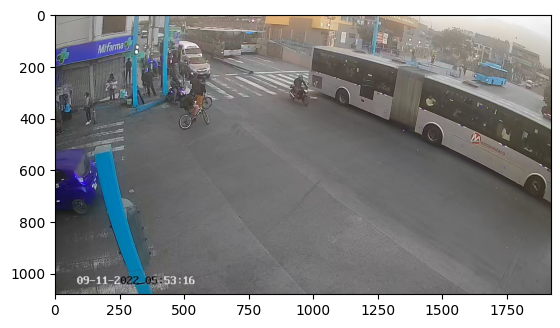

In [13]:
cap.set(1, 3900)
ret, frame = cap.read()
plt.imshow(frame)

In [14]:
#bbox”: A list of four numbers representing 
#the bounding box of the annotated object in
# the format [x, y, width, height], where (x, y) is the top-left corner of the bounding box.

top = 257
left = 905

right = 79+left
bottom = 97+top

In [15]:
img = cv2.rectangle(frame.copy(), (left,top),(right,bottom),(0,255,0),2 )

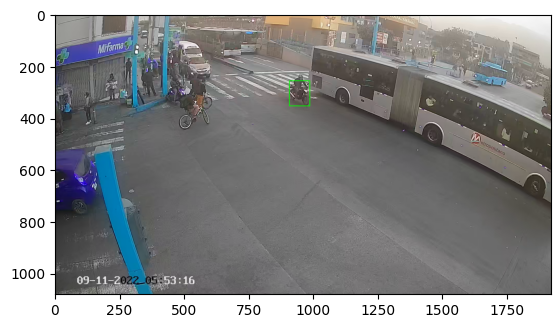

In [16]:
plt.imshow(img)

# Save img

In [134]:
cap = cv2.VideoCapture("./data/videos/video1.mp4")
count = 0
while True:
    ret, frame = cap.read()
    if count >= 29970:
        if ret and (count <=29970 + 170):
            name = "./data/fine_tuned_yolo_data/images/"+str(count) + ".jpg"
            cv2.imwrite(name,frame)
        else:
            break
    
    count = count + 1
cap.release()

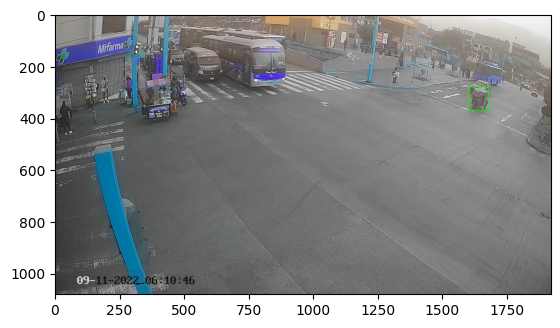

In [135]:
frame = cv2.imread("./data/fine_tuned_yolo_data/images/30138.jpg")

box = []
with open("./data/fine_tuned_yolo_data/labels/frame_030138.txt", "r") as f:
    for i in f:
        box.append(i.split())
f.close()

cl,x,y,w,h = [eval(i) for i in box[1]]
h_frame,w_frame,channel = frame.shape
# top left
xtl = int(x*w_frame-w*w_frame/2)
ytl = int(y*h_frame+h*h_frame/2)

# bottom right
xbr = int(x*w_frame+w*w_frame/2)
ybr = int(y*h_frame-h*h_frame/2)

img = cv2.rectangle(frame.copy(), (xtl,ytl),(xbr,ybr),(0,255,0),2 )
plt.imshow(img)

# Merge annotations

In [168]:
annotation1 = open("./data/anotaciones-video1/moto.json")
moto_an = json.load(annotation1)
annotation1.close()

annotation2 =open("./data/anotaciones-video1/auto_instances_default.json")
camioneta_an = json.load(annotation2)
annotation2.close()

In [169]:
print(moto_an.keys())
print(camioneta_an.keys())

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])
dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])


In [170]:
print(len(moto_an["annotations"]))
print(len(camioneta_an["annotations"]))

256
105


In [171]:
print(moto_an["categories"])
print(camioneta_an["categories"])

[{'id': 1, 'name': 'Mototaxi', 'supercategory': ''}, {'id': 2, 'name': 'Moto lineal', 'supercategory': ''}]
[{'id': 1, 'name': 'Auto Privado', 'supercategory': ''}, {'id': 2, 'name': 'Otros', 'supercategory': ''}]


In [172]:
print(moto_an["annotations"][0])
print("*********")
print(camioneta_an["annotations"][0])

{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 9397.673999999992, 'bbox': [428.37, 245.5, 85.8, 109.53], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}
*********
{'id': 1, 'image_id': 24, 'category_id': 1, 'segmentation': [], 'area': 176705.0, 'bbox': [351.0, 525.0, 599.0, 295.0], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}
